In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
#import matplotlib.gridspec as gridspec
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
import matplotlib.font_manager
import random 
from matplotlib import rcParams, cm
import scipy.stats as ss
import h5py
import glob
import seaborn as sns
import time
import os
import itertools
import timeit
import networkx as nx
import collections 
import scipy.io
from matplotlib import gridspec 
#For ROI Maps
from scipy.io import loadmat
from skimage import measure
from scipy import ndimage

#For Fitting Baselines
from scipy.optimize import curve_fit

#For Clustering
from sklearn.cluster.bicluster import SpectralBiclustering

In [69]:
%matplotlib inline

In [70]:
#matplotlib.font_manager._rebuild()
#Set matplotlib fonts for figures
rcParams['font.family'] = 'Arial'

## Last day of training/extinction 

In [71]:
def makeAliFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    if m_day == 2:
                        filenames[mouse_dir] = 'trace_kyleFinalwDoughnut_allBGs_BinaryVideo.hdf5'
                    else:
                        filenames[mouse_dir] = 'trace_kyleFinalwDoughnut_allBGs_matched_BinaryVideo.hdf5'
    return directories, filenames

In [72]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces.h5'
                   
    return directories, filenames

In [73]:
def makeRebeccaFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
    return directories, filenames

In [74]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces.h5'
    return directories, filenames

In [75]:
def combineFilenames(base, dirs, fnDict):
    #Combine Filenames into list for multiple directories with a common base.  fnDict is a dictionary of the filename for each directory
    outFiles = []
    for d in dirs:
        outFiles.append(os.path.join(base+d+fnDict[d]))
    return outFiles

In [76]:
#Initialize Input Values
#Ali Mice
aliBase = '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24, 25, 26], [2,5], [1, 2])
aliFolders, aliFilenames = makeAliFilenames(aliMice, aliDays, aliSessions)
aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'

rMice, rDays, rSessions = ([2982,4540], [1,9], [1])
rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [1, 5], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
allFiles = aliFiles + rFiles + nrFiles
print(allFiles)

['/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/trace_kyleFinalwDoughnut_allBGs_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s1/trace_kyleFinalwDoughnut_allBGs_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s2/trace_kyleFinalwDoughnut_allBGs_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/trace_kyleFinalwDoughnut_allBGs_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s1/trace_kyleFinalwDoughnut_allBGs_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s2/trace_kyleFinalwDoughnut_allBGs_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/trace_kyleFinalwDoughnut_allBGs_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s1/trace_kyleFinalwDoughnut_allBGs_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s2/trace_kyleFinalwDoughnut_allBGs_matched_BinaryVideo.hdf5', '/mnt/

### Load behavior data 

In [10]:
def loadFiles(allFiles, fieldName, whichData=None, multiIndex=False, fixedSize=None):
    #Get File Inputs
    firstf = allFiles[0]
    firstdir = firstf.split('/')[-2]
    f = h5py.File(firstf, 'r')
    if multiIndex: #Adjust indexing for first DataFrame if using a multi-index
        first_array = np.array(f[fieldName]).T
        index_iterables = [[firstdir], range(first_array.shape[1])]
        index = pd.MultiIndex.from_product(index_iterables, names=['mouse','cell_num'])
        df = pd.DataFrame(data=first_array, columns=index)
    else:
        if fixedSize == None:
            df = pd.DataFrame(data=np.array(f[fieldName]).T, columns=[firstdir])
        else:
            df = pd.DataFrame(data=np.array(f[fieldName]).T[:(fixedSize)], columns=[firstdir])
    
    df.index.name='Time'
    df_size = df.shape[0] #Determine Size of DataFrame
    for f in allFiles[1:]: #Loop through remaining files and add to DataFrame
        fdir = f.split('/')[-2] #Current Filename/Dir
        f = h5py.File(f, 'r')
        if multiIndex: #Iteratively add multiIndexed DataFrames
            data_arr = np.array(f[fieldName]).T
            index_iterables = [[fdir], range(data_arr.shape[1])]
            index = pd.MultiIndex.from_product(index_iterables, names=['mouse', 'cell_num'])
            df = df.join(pd.DataFrame(data=data_arr, columns=index))
        else:
            #print(f)
            #print(df.shape)
            #print(df_size)
            #print(np.array(f[fieldName]).T.shape)
            try: #Standard Loading
                df.loc[:,fdir] = np.array(f[fieldName]).T 
            except ValueError: #Exception cases where behavior was different size from other behavior sessions
                if (whichData == 'Ali'): #Ali26_d5_s2 and Ali25_d5_s2 are one frame short
                    df.loc[:,fdir] = np.insert(np.array(f[fieldName]).T, 0, np.array(f[fieldName]).T.mean())
                elif np.array(f[fieldName]).T.shape[0]<df_size:
                    temp = np.array(f[fieldName]).T
                    df.loc[:,fdir] = np.append(temp, temp.mean().reshape(1,-1), axis=0)
                elif (whichData == 'Rebecca'): #2982_d9_s1 is one frame longer
                    new_size = np.array(f[fieldName]).shape[1]
                    diff_size = abs(new_size-df_size)
                    df.loc[:,fdir] = np.array(f[fieldName]).T[:-diff_size]
    drop_index = df.index[df.isna().any(axis='columns')]
    df = df.drop(drop_index)
    return df

In [11]:
aliSounds = loadFiles(aliFiles, 'binSounds', whichData='Ali')
rSounds = loadFiles(rFiles, 'binSounds', whichData='Rebecca')
nrSounds = loadFiles(nrFiles, 'binSounds', whichData='Rebecca', fixedSize=39500)
sound_traces = pd.concat([aliSounds,rSounds,nrSounds], axis=1)

In [12]:
aliPuffs = loadFiles(aliFiles, 'binPuffs', whichData='Ali')
rPuffs = loadFiles(rFiles, 'binPuffs', whichData='Rebecca')
nrPuffs = loadFiles(nrFiles, 'binPuffs', whichData='Rebecca', fixedSize=39500)
puff_traces = pd.concat([aliPuffs,rPuffs,nrPuffs], axis=1)

In [13]:
aliTrials = loadFiles(aliFiles, 'binTrials', whichData='Ali')
rTrials = loadFiles(rFiles, 'binTrials', whichData='Rebecca')
nrTrials = loadFiles(nrFiles, 'binTrials', whichData='Rebecca', fixedSize=39500)
trial_traces = pd.concat([aliTrials,rTrials,nrTrials], axis=1)

In [14]:
aliEyeTraces = loadFiles(aliFiles, 'eyeTrace', whichData='Ali')
rEyeTraces = loadFiles(rFiles, 'eyeTrace', whichData='Rebecca')
nrEyeTraces = loadFiles(nrFiles, 'eyeTrace', whichData='Rebecca', fixedSize=39500)
eye_traces = pd.concat([aliEyeTraces,rEyeTraces,nrEyeTraces], axis=1)

## Function to make trial blocks

In [15]:
def findPulses(inputTrace):
    #Find location of onset and offset of pulses
    #inputTrace = 1-D Numpy Array Trace of values assumed to be similar to a train of ttl pulses, where there is a clear onset and offset for each pulse.
    #locationTrace = Pseudo-logical 1-D trace, with 1s at pulse onset, and -1s at pulse offset, and 0s everywhere else
    
    shiftedInput = inputTrace - inputTrace.mean() #Shift to have mean 0 and baseline below 0
    changes = np.sign(shiftedInput) #Find where sign changes
    locationTrace = np.zeros(inputTrace.shape); #Initialize Output
    #locationTrace = np.zeros((behav_df.shape[0]+1,behav_df.shape[1]))
    diffArray = np.diff(changes)
    locationTrace[np.insert(diffArray==2,0,0)] = 1 #Set onsets to 1
    locationTrace[np.insert(diffArray==-2,0,0)] = -1 #Set offsets to -1
    return locationTrace

In [16]:
def makeTraceTrialBlocks(trace_df, behav_df):
    #Make Blocks of Trials for Traces (with MultiIndex), and return df with those trial blocks removed
    #Pre-defined Values
    tot_block_time = 201 #201 timepoints is about 10 seconds
    before_sound_time = 40 #40 timepoints before the puff 2 seconds
    after_sound_time = tot_block_time - before_sound_time - 1 #Time after sound.  Subtract 1 as index between before sound and after sound is included as "spot"
    #Shorten behav_df to length of trace_df
    behav_length = behav_df.shape[0]
    trace_length = trace_df.shape[0]
    if behav_length > trace_length:
        behav_df = behav_df.loc[:(trace_length-1),:]
    #Initialize Lists
    trace_blocks=[]
    trace_noBlocks=[]
    for mouse, cell_df in trace_df.groupby(level='mouse', axis=1):
        print(mouse) #Output Tracking
        #Shape Behavior Data
        soundPulses = findPulses(behav_df.loc[:,mouse])
        sound_on_inds = behav_df.index[soundPulses == 1]
        if sound_on_inds[-1]+after_sound_time > trace_df.loc[:,mouse].shape[0]: #Get rid of last pulse on at end of recording
            sound_on_inds = sound_on_inds[:-1]
        #Setup Numpy Arrays for Faster Loops
        cur_block = np.zeros((tot_block_time, sound_on_inds.shape[0], cell_df.shape[1]))
        cur_noBlock = cell_df.copy()
        cur_blockDrop = []
        for trial_idx, spot in enumerate(sound_on_inds):
            cur_block[:, trial_idx, :] = cell_df.loc[(spot-before_sound_time):(spot+after_sound_time), :].values
            cur_blockDrop.append(range((spot-before_sound_time), (spot+after_sound_time)))
        #Drop Indexes from Current Values and Save Dataframe
        flat_blockDrop = [value for sublist in cur_blockDrop for value in sublist]
        trace_noBlocks.append(cur_noBlock.drop(flat_blockDrop).reset_index(drop=True))
        #Make DataFrame for Current Cell Case
        mIdx = pd.MultiIndex.from_product([[mouse], range(sound_on_inds.shape[0]), range(cell_df.shape[1])], names=['mouse', 'trial', 'cell_num'])
        cur_df = pd.DataFrame(data=cur_block.reshape(tot_block_time,-1), columns=mIdx)
        trace_blocks.append(cur_df)
    #Convert Lists into Concatenated DataFrame
    trace_noBlocks_df = pd.concat(trace_noBlocks, axis=1)
    trace_blocks_df = pd.concat(trace_blocks, axis=1)
    trace_blocks_df.index.name = 'Time'
    return trace_blocks_df, trace_noBlocks_df

## Loading binary traces after event detection ( event onsets as 1)

In [17]:
#Initialize Input Values
#Ali Mice
aliBase = '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [2,5], [1,2])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [1,9], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [1,5], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d5_s2/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d5_s2/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d5_s2/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d1_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d9_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d1_s1/binary_traces.h5', '/mnt/eng_handata/eng_research

In [18]:
def loadbinaryTraces(files, whichData):
    #Load all the trace data and normalize traces with baseline adjustments
    #Load and doughnut subtract traces
    binTraces = loadFiles(files, 'binary_trace', whichData=whichData, multiIndex=True)
    
    return binTraces

In [19]:
ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

#### Sanity Check

In [20]:
np.unique(ali_binary_traces['ali24_d5_s2'])

array([0., 1.])

In [21]:
ali_binary_traces['ali24_d5_s2']

cell_num,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,300
Time,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26477,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26478,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26479,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Make trial blocks

In [22]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(ali_binary_traces, aliSounds)
#bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(aliMatched, aliSounds)
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d2_s1
ali24_d5_s1
ali24_d5_s2
ali25_d2_s1
ali25_d5_s1
ali25_d5_s2
ali26_d2_s1
ali26_d5_s1
ali26_d5_s2
Rebecca Binary Blocks
2982_d1_s1
2982_d9_s1
4540_d1_s1
4540_d9_s1
New Rebecca Binary Blocks
2712_d1_s1
2712_d5_s1
2713_d1_s1
2713_d5_s1
2714_d1_s1
2714_d5_s1
8089_d1_s1
8089_d5_s1


In [23]:
print(bin_aliTraceBlocks['ali24_d5_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d5_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d5_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d9_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d9_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d5_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d5_s1'].columns.unique('cell_num').shape)

(301,)
(133,)
(419,)
(306,)
(266,)
(127,)
(141,)
(153,)
(75,)


In [24]:
total_cells_lastday = bin_aliTraceBlocks['ali24_d5_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d5_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d9_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d9_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d5_s1'].columns.unique('cell_num').shape[0]
total_cells_lastday

1661

In [25]:
total_cells_lastday_all = bin_aliTraceBlocks['ali24_d5_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali25_d5_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d5_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d9_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d9_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d5_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2712_d5_s1'].columns.unique('cell_num').shape[0]
total_cells_lastday_all

1921

In [26]:
#Colormap Creation from Other Colormap
full_gist = cm.get_cmap('gist_stern',256)
topgist_cm = ListedColormap(full_gist(np.linspace(0.25, 1, 256)))

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


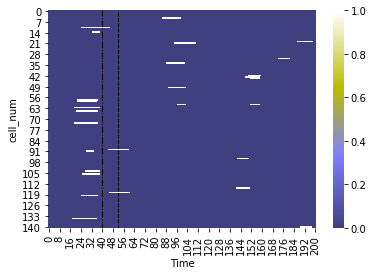

In [27]:
a=bin_nrTraceBlocks['2713_d5_s1'].loc[:,10]
sns.heatmap(a.T,cmap=topgist_cm)
plt.axvline(x=40, linestyle='-.', color='k', linewidth=1)
plt.axvline(x=52, linestyle='--', color='k', linewidth=1)
#plt.savefig('event_detection_4.png',format='png')

## New method of shuffling to determine active cells 

In [28]:
bin_aliTraceNoBlocks['ali24_d5_s1'].shape

(18482, 301)

In [29]:
20*1*20

400

In [30]:
# need to select 20 non overlapping segments for every cell and search for 1's ! 
#0th cell
bin_aliTraceNoBlocks['ali24_d5_s1'].loc[:,0]
#np.array(np.where(mouse_df.loc[:,cell]==1)).size

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
18477    0.0
18478    0.0
18479    0.0
18480    0.0
18481    0.0
Name: 0, Length: 18482, dtype: float64

In [31]:
# https://stackoverflow.com/questions/18641272/n-random-contiguous-and-non-overlapping-subsequences-each-of-length

In [32]:
def rand_parts(seq, n, l):
    indices = range(len(seq) - (l - 1) * n)
    result = []
    offset = 0
    for i in sorted(random.sample(indices, n)):
        i += offset
        result.append(seq[i:i+l])
        offset += l - 1
    return result

In [33]:
seq=np.arange(0,18482,1)

seq

array([    0,     1,     2, ..., 18479, 18480, 18481])

In [34]:
type(rand_parts([1, 2, 3, 4, 5, 6], 2, 2))

list

In [35]:
ind=rand_parts(seq,20,20)
ind

[array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
        22, 23, 24]),
 array([530, 531, 532, 533, 534, 535, 536, 537, 538, 539, 540, 541, 542,
        543, 544, 545, 546, 547, 548, 549]),
 array([3825, 3826, 3827, 3828, 3829, 3830, 3831, 3832, 3833, 3834, 3835,
        3836, 3837, 3838, 3839, 3840, 3841, 3842, 3843, 3844]),
 array([5811, 5812, 5813, 5814, 5815, 5816, 5817, 5818, 5819, 5820, 5821,
        5822, 5823, 5824, 5825, 5826, 5827, 5828, 5829, 5830]),
 array([6024, 6025, 6026, 6027, 6028, 6029, 6030, 6031, 6032, 6033, 6034,
        6035, 6036, 6037, 6038, 6039, 6040, 6041, 6042, 6043]),
 array([6489, 6490, 6491, 6492, 6493, 6494, 6495, 6496, 6497, 6498, 6499,
        6500, 6501, 6502, 6503, 6504, 6505, 6506, 6507, 6508]),
 array([7270, 7271, 7272, 7273, 7274, 7275, 7276, 7277, 7278, 7279, 7280,
        7281, 7282, 7283, 7284, 7285, 7286, 7287, 7288, 7289]),
 array([7673, 7674, 7675, 7676, 7677, 7678, 7679, 7680, 7681, 7682, 7683,
        7684, 7685, 

In [36]:
temp_df=bin_aliTraceNoBlocks['ali24_d5_s1'].loc[ind[19],0]
np.array(np.where(temp_df==1)).size

0

In [37]:
# Do below 1000 times and build distribution for each cell- get mean and std dev
# Below is for one cell in a session- 2nd cell
percent_active_trials=np.zeros((1000,1))
for n in range(0,1000,1):
    ind=rand_parts(seq,20,20)
    active_trials=[]
    for i in np.arange(0,20,1):
        temp_df=bin_aliTraceNoBlocks['ali24_d5_s1'].loc[ind[i],1]
        active_trials.append(np.array(np.where(temp_df==1)).size)
#percent_active_trials=active_trials/20*100
    percent_active_trials[n]=np.sum(active_trials)/400
percent_active_trials

array([[0.0825],
       [0.    ],
       [0.0825],
       [0.0225],
       [0.02  ],
       [0.0775],
       [0.0225],
       [0.0775],
       [0.0075],
       [0.005 ],
       [0.    ],
       [0.045 ],
       [0.06  ],
       [0.06  ],
       [0.0675],
       [0.    ],
       [0.0125],
       [0.0125],
       [0.    ],
       [0.07  ],
       [0.025 ],
       [0.    ],
       [0.    ],
       [0.0425],
       [0.035 ],
       [0.035 ],
       [0.065 ],
       [0.0175],
       [0.    ],
       [0.05  ],
       [0.035 ],
       [0.03  ],
       [0.0125],
       [0.05  ],
       [0.    ],
       [0.0575],
       [0.0825],
       [0.    ],
       [0.0925],
       [0.0575],
       [0.    ],
       [0.    ],
       [0.0125],
       [0.    ],
       [0.    ],
       [0.08  ],
       [0.0175],
       [0.045 ],
       [0.0075],
       [0.035 ],
       [0.1125],
       [0.0175],
       [0.1375],
       [0.025 ],
       [0.    ],
       [0.03  ],
       [0.    ],
       [0.0275],
       [0.025 

In [38]:
# Do below 1000 times and build distribution for each cell- get mean and std dev
# Below is for one cell in a session- 2nd cell

ind=rand_parts(seq,20,20)
active_trials=[]
for i in np.arange(0,20,1):
    temp_df=bin_aliTraceNoBlocks['ali24_d5_s1'].loc[ind[i],100]
    a= np.array(np.where(temp_df==1)).size
   
    active_trials.append(a)
    print(active_trials)
print(np.mean(active_trials))

[0]
[0, 0]
[0, 0, 0]
[0, 0, 0, 0]
[0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4]
[0, 0, 0, 0, 0, 0, 0, 4, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
0.2


In [39]:
a=np.array([2,1,0,1,0,3,4,2,1,1,1,1,0])
active_trials=[]
for i in np.arange(0,a.shape[0],1):
    if a[i]>1:
        active_trials.append(1)
    else:
        active_trials.append(a[i])
active_trials

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0]

In [40]:
np.mean(percent_active_trials),np.std(percent_active_trials)

(0.0236275, 0.028616821866692323)

In [41]:
np.mean(percent_active_trials)+2*np.std(percent_active_trials)

0.08086114373338464

In [42]:
percent_active_trials.shape

(1000, 1)

## Method 2- Sum over 20 frames and then take mean 

In [43]:
# Alternative way .look for each segment - add all 1's take mean across 20 trials ?

import time
start = time.time()

percent_active_trials=np.zeros((1000,1))
threshold=[]
threshold2=[]
for cell in range(0,10,1):
    print(cell)
    for n in range(0,1000,1):
        ind=rand_parts(seq,20,20)
        active_trials=[]
        for i in np.arange(0,20,1):
            temp_df=bin_aliTraceNoBlocks['ali24_d5_s1'].loc[ind[i],cell]
            active_trials.append(np.array(np.where(temp_df==1)).size)
#percent_active_trials=active_trials/20*100
        percent_active_trials[n]=np.mean(active_trials)
    threshold.append(np.mean(percent_active_trials)+2*np.std(percent_active_trials))
    threshold2.append(np.percentile(percent_active_trials,95))
    
print(threshold)
print(threshold2)
end = time.time()
print(end - start)

0
1
2
3
4
5
6
7
8
9
[2.0722170616478337, 1.5822569028544715, 2.212930494740787, 1.6068363305332183, 1.4761771967234898, 1.7855341477745235, 1.8588980857283874, 1.662757127194729, 2.0087794333196514, 0.7484779528742385]
[2.0, 1.55, 2.1, 1.6, 1.5, 1.75, 1.9, 1.65, 2.0, 0.95]
192.5136013031006


# Actual active trials 

In [44]:
# Compare 2nd cell firing rate in first 20 trials to above mean + 2std dev
Nfirst=20
Ntrials=40
mouse_df=bin_aliTraceBlocks['ali24_d5_s1'].loc[:, bin_aliTraceBlocks['ali24_d5_s1'].columns.get_level_values('trial').isin(range(Nfirst,Ntrials))]
trials = mouse_df.columns.unique('trial')
Ntrials = trials.shape[0]
cells = mouse_df.columns.unique('cell_num')
Ncells = cells.shape[0]
tone_time=40
window_end = 60
out_bin= np.zeros((Ncells))
for cell in cells:
    active_trials=[]
    for trial in trials:
        temp_df=mouse_df[trial].loc[tone_time:window_end,cell]
        a=np.array(np.where(temp_df==1))
        active_trials.append(a.size)
    #print(active_trials)
    out_bin[cell]=np.mean(active_trials)

out_bin

array([2.05, 1.65, 1.25, 0.  , 0.  , 5.55, 1.75, 1.65, 2.35, 0.5 , 0.25,
       0.  , 0.35, 0.5 , 0.  , 0.  , 0.  , 0.75, 0.75, 2.65, 0.65, 0.  ,
       1.9 , 1.4 , 0.6 , 2.05, 0.  , 2.45, 0.95, 0.5 , 0.  , 1.3 , 0.5 ,
       0.  , 0.  , 0.35, 0.  , 0.  , 0.9 , 3.4 , 2.85, 3.15, 1.4 , 2.9 ,
       0.  , 1.3 , 0.45, 0.1 , 0.95, 1.25, 1.45, 0.4 , 0.05, 0.  , 0.  ,
       2.35, 2.95, 0.7 , 0.65, 1.75, 2.7 , 0.65, 0.  , 1.4 , 2.15, 2.6 ,
       2.6 , 0.3 , 0.  , 0.05, 0.05, 0.  , 0.  , 1.4 , 1.95, 1.75, 0.  ,
       0.  , 1.65, 0.9 , 1.85, 2.95, 1.05, 2.9 , 2.4 , 0.8 , 1.35, 0.05,
       2.55, 1.45, 0.  , 0.  , 0.9 , 0.  , 0.8 , 0.  , 0.  , 0.4 , 0.45,
       0.  , 0.45, 0.  , 0.  , 1.1 , 0.65, 2.25, 2.75, 0.  , 1.6 , 0.3 ,
       0.  , 0.  , 1.  , 1.2 , 0.  , 0.75, 1.5 , 0.3 , 0.4 , 0.45, 1.7 ,
       1.05, 2.25, 1.1 , 0.  , 1.4 , 1.75, 1.4 , 0.  , 0.  , 1.25, 3.35,
       0.8 , 1.15, 0.7 , 0.75, 0.9 , 0.  , 0.  , 1.05, 0.  , 1.05, 0.65,
       1.8 , 0.  , 2.  , 1.45, 2.2 , 1.5 , 1.25, 2.

In [49]:
out_bin[0:10]>threshold2

array([ True,  True, False, False, False,  True, False, False,  True,
       False])

## Method  - sum 20 frames then mean across

In [50]:
#Do below 1000 times and build distribution for each cell- get mean and std dev


def get_threshold_cell_wise(mouse_df):
    percent_active_trials=np.zeros((1000,1))
    # threshold as mean+ 2 std dev of background distribution
    threshold=[]
    threshold2=[]
    cells = mouse_df.columns.unique('cell_num')
    Ncells = cells.shape[0]
    print(Ncells)
    seq=np.arange(0,mouse_df.shape[0],1)
    for cell in range(0,Ncells,1):
        #Repeat the shuffle 1000 times
        for n in range(0,1000,1):
            # 20 segments of 20 frames (non-overlapping) randomly picked.
            ind=rand_parts(seq,20,20)
            active_trials=[]
            for i in np.arange(0,20,1):
                temp_df=mouse_df.loc[ind[i],cell]
                a= np.array(np.where(temp_df==1)).size
                active_trials.append(a)
            percent_active_trials[n]=np.mean(active_trials)
       
        threshold.append(np.percentile(percent_active_trials,95))
    threshold=np.array(threshold)
    
    print('Done calculating thresholds')
    return threshold

In [51]:
threshold_ali24=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali24_d5_s1'])
threshold_ali25=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali25_d5_s1'])
threshold_ali26=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali26_d5_s1'])

301
Done calculating thresholds
133
Done calculating thresholds
419
Done calculating thresholds


In [52]:
np.mean(threshold_ali24),np.mean(threshold_ali25),np.mean(threshold_ali26)

(1.4912292358803982, 1.2355451127819548, 1.386754176610978)

In [53]:
np.std(threshold_ali24),np.std(threshold_ali25),np.std(threshold_ali26)

(0.4112107161769397, 0.48411062342113276, 0.428804356143581)

In [54]:
threshold_2982=get_threshold_cell_wise(bin_rTraceNoBlocks['2982_d9_s1'])
threshold_4540=get_threshold_cell_wise(bin_rTraceNoBlocks['4540_d9_s1'])

306
Done calculating thresholds
266
Done calculating thresholds


In [55]:
np.mean(threshold_2982),np.mean(threshold_4540)

(0.9876797385620912, 1.2296710526315786)

In [56]:
threshold_2712=get_threshold_cell_wise(bin_nrTraceNoBlocks['2712_d5_s1'])
threshold_2713=get_threshold_cell_wise(bin_nrTraceNoBlocks['2713_d5_s1'])
threshold_2714=get_threshold_cell_wise(bin_nrTraceNoBlocks['2714_d5_s1'])
threshold_8089=get_threshold_cell_wise(bin_nrTraceNoBlocks['8089_d5_s1'])

127
Done calculating thresholds
141
Done calculating thresholds
153
Done calculating thresholds
75
Done calculating thresholds


In [57]:
np.mean(threshold_2712),np.mean(threshold_2713),np.mean(threshold_2714),np.mean(threshold_8089)

(1.1862795275590545, 1.3252304964539003, 1.1879084967320257, 1.545733333333333)

## Extinction session

In [58]:
threshold_ali24_EX=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali24_d5_s2'])
threshold_ali25_EX=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali25_d5_s2'])
threshold_ali26_EX=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali26_d5_s2'])

301
Done calculating thresholds
133
Done calculating thresholds
419
Done calculating thresholds


In [67]:
## Save all the thresholds for last day/EX in a .h5 file
f1 = h5py.File("Thresholds_CS_EX.h5", "w")
dset1 = f1.create_dataset("/Ali_24", data=threshold_ali24)
dset1 = f1.create_dataset("/Ali_24_EX", data=threshold_ali24_EX)
dset1 = f1.create_dataset("/Ali_25", data=threshold_ali25)
dset1 = f1.create_dataset("/Ali_25_EX", data=threshold_ali25_EX)
dset1 = f1.create_dataset("/Ali_26", data=threshold_ali26)
dset1 = f1.create_dataset("/Ali_26_EX", data=threshold_ali26_EX)
dset1 = f1.create_dataset("/2982", data=threshold_2982)
dset1 = f1.create_dataset("/4540", data=threshold_4540)
dset1 = f1.create_dataset("/2712", data=threshold_2712)
dset1 = f1.create_dataset("/2713", data=threshold_2713)
dset1 = f1.create_dataset("/2714", data=threshold_2714)
dset1 = f1.create_dataset("/8089", data=threshold_8089)
list(f1.keys())
f1.close()

## First training session

### Loading binary traces for first sessions 

In [59]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces.h5'
                   
    return directories, filenames

In [60]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces.h5'
    return directories, filenames

In [61]:
#Initialize Input Values
#Ali Mice
aliBase = '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [2], [1])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [1], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712,2713,2714,8089], [1], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d2_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d2_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d2_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d1_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d1_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d1_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2713/2713_d1_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2714/2714_d1_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/8089/8089_d1_s1/binary_traces.h5']


In [77]:
first_ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
first_r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
first_nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

In [78]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(first_ali_binary_traces, aliSounds)
#bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(aliMatched, aliSounds)
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(first_r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(first_nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d2_s1
ali25_d2_s1
ali26_d2_s1
Rebecca Binary Blocks
2982_d1_s1
4540_d1_s1
New Rebecca Binary Blocks
2712_d1_s1
2713_d1_s1
2714_d1_s1
8089_d1_s1


In [79]:
print(bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d2_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape)

(862,)
(761,)
(756,)
(115,)
(187,)
(113,)
(143,)
(234,)
(70,)


In [80]:
total_cells_firstday_all = bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali25_d2_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2712_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape[0]
total_cells_firstday_all

3241

In [81]:
total_cells_firstday = bin_aliTraceBlocks['ali24_d2_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d2_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d1_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d1_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d1_s1'].columns.unique('cell_num').shape[0]
total_cells_firstday

2367

## Calculating thresholds by shuffling 

In [82]:
threshold_ali24_FS=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali24_d2_s1'])
threshold_ali25_FS=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali25_d2_s1'])
threshold_ali26_FS=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali26_d2_s1'])

862
Done calculating thresholds
761
Done calculating thresholds
756
Done calculating thresholds


In [83]:
threshold_2982_FS=get_threshold_cell_wise(bin_rTraceNoBlocks['2982_d1_s1'])
threshold_4540_FS=get_threshold_cell_wise(bin_rTraceNoBlocks['4540_d1_s1'])

115
Done calculating thresholds
187
Done calculating thresholds


In [84]:
threshold_2712_FS=get_threshold_cell_wise(bin_nrTraceNoBlocks['2712_d1_s1'])
threshold_2713_FS=get_threshold_cell_wise(bin_nrTraceNoBlocks['2713_d1_s1'])
threshold_2714_FS=get_threshold_cell_wise(bin_nrTraceNoBlocks['2714_d1_s1'])
threshold_8089_FS=get_threshold_cell_wise(bin_nrTraceNoBlocks['8089_d1_s1'])

113
Done calculating thresholds
143
Done calculating thresholds
234
Done calculating thresholds
70
Done calculating thresholds


In [85]:
## Save all the thresholds for last day/EX in a .h5 file
f1 = h5py.File("Thresholds_FS.h5", "w")
dset1 = f1.create_dataset("/Ali_24", data=threshold_ali24_FS)
dset1 = f1.create_dataset("/Ali_25", data=threshold_ali25_FS)
dset1 = f1.create_dataset("/Ali_26", data=threshold_ali26_FS)
dset1 = f1.create_dataset("/2982", data=threshold_2982_FS)
dset1 = f1.create_dataset("/4540", data=threshold_4540_FS)
dset1 = f1.create_dataset("/2712", data=threshold_2712_FS)
dset1 = f1.create_dataset("/2713", data=threshold_2713_FS)
dset1 = f1.create_dataset("/2714", data=threshold_2714_FS)
dset1 = f1.create_dataset("/8089", data=threshold_8089_FS)
list(f1.keys())
f1.close()

## Day before extinction 

In [86]:
def makeAliFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'binary_traces.h5'
                   
    return directories, filenames

In [87]:
def makeRebeccaFilenames_modified(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'binary_traces.h5'
    return directories, filenames

In [88]:
#Initialize Input Values
#Ali Mice
aliBase = '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [4], [1])
aliFolders, aliFilenames = makeAliFilenames_modified(aliMice, aliDays, aliSessions)
bin_aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [8], [1])
rFolders, rFilenames = makeRebeccaFilenames_modified(rMice, rDays, rSessions)
bin_rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mice
nrBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames_modified(nrMice, nrDays, nrSessions)
bin_nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
bin_allFiles = bin_aliFiles + bin_rFiles + bin_nrFiles
print(bin_allFiles)

['/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d4_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d4_s1/binary_traces.h5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d4_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d8_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d8_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d4_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2713/2713_d4_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2714/2714_d4_s1/binary_traces.h5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/8089/8089_d4_s1/binary_traces.h5']


In [89]:
def loadbinaryTraces(files, whichData):
    #Load all the trace data and normalize traces with baseline adjustments
    #Load and doughnut subtract traces
    binTraces = loadFiles(files, 'binary_trace', whichData=whichData, multiIndex=True)
    
    return binTraces

In [90]:
ali_binary_traces=loadbinaryTraces(bin_aliFiles, 'Ali')
r_binary_traces=loadbinaryTraces(bin_rFiles, 'Rebecca')
nr_binary_traces=loadbinaryTraces(bin_nrFiles, 'Rebecca')

### Need to load aliSounds,rSounds and nrSounds

In [91]:
def makeAliFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                if ((m_day != 2) | (m_sess != 2)): #Skip d2_s2.  Only do d5_s2
                    mouse_dir = 'ali{}_d{}_s{}/'.format(m_num, m_day, m_sess)
                    directories.append(mouse_dir)
                    filenames[mouse_dir] = 'trace_kyleFinal_matched_BinaryVideo.hdf5'
                   
    return directories, filenames

In [92]:
def makeRebeccaFilenames(mouse_numbers, mouse_days, mouse_sessions):
    #Input lists of mouse numbers, days, and sessions to permute to give out directories and dictionary for filename
    directories = []
    filenames = {}
    for m_num in mouse_numbers:
        for m_day in mouse_days:
            for m_sess in mouse_sessions:
                mouse_dir = '{}/{}_d{}_s{}/'.format(m_num, m_num, m_day, m_sess)
                directories.append(mouse_dir)
                filenames[mouse_dir] = 'trace_kyleFinal_BinaryVideo.hdf5'
    return directories, filenames

In [93]:

#Ali Mice
aliBase = '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/'
aliMice, aliDays, aliSessions = ([24,25,26], [4], [1,2])
aliFolders, aliFilenames = makeAliFilenames(aliMice, aliDays, aliSessions)
aliFiles = combineFilenames(aliBase, aliFolders, aliFilenames)
#Rebecca Mice
rBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/'
rMice, rDays, rSessions = ([2982,4540], [8], [1])
rFolders, rFilenames = makeRebeccaFilenames(rMice, rDays, rSessions)
rFiles = combineFilenames(rBase, rFolders, rFilenames)
#New Rebecca Mic_
nrBase = '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/'
nrMice, nrDays, nrSessions = ([2712, 2713,2714,8089], [4], [1]) #Also have 2 as full imaging session.  Drop 2714 because of data quality
nrFolders, nrFilenames = makeRebeccaFilenames(nrMice, nrDays, nrSessions)
nrFiles = combineFilenames(nrBase, nrFolders, nrFilenames)
#Combine All Filenames into one List
allFiles = aliFiles + rFiles + nrFiles
print(allFiles)

['/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali24_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali25_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d4_s1/trace_kyleFinal_matched_BinaryVideo.hdf5', '/mnt/eng_handata/Kyle_Hansen/AliEyeBlink/ali26_d4_s2/trace_kyleFinal_matched_BinaryVideo.hdf5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/2982/2982_d8_s1/trace_kyleFinal_BinaryVideo.hdf5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff-Rebecca/4540/4540_d8_s1/trace_kyleFinal_BinaryVideo.hdf5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/TonePuff_Rebecca2/2712/2712_d4_s1/trace_kyleFinal_BinaryVideo.hdf5', '/mnt/eng_handata/eng_research_handata2/Kyle_Hansen/Tone

In [94]:
aliSounds = loadFiles(aliFiles, 'binSounds', whichData='Ali')
rSounds = loadFiles(rFiles, 'binSounds', whichData='Rebecca')
nrSounds = loadFiles(nrFiles, 'binSounds', whichData='Rebecca', fixedSize=39500)
sound_traces = pd.concat([aliSounds,rSounds,nrSounds], axis=1)
#sound_traces = pd.concat([rSounds,nrSounds], axis=1)

In [95]:
print('Ali Binary Blocks')
bin_aliTraceBlocks, bin_aliTraceNoBlocks = makeTraceTrialBlocks(ali_binary_traces, aliSounds) 
print('Rebecca Binary Blocks')
bin_rTraceBlocks, bin_rTraceNoBlocks = makeTraceTrialBlocks(r_binary_traces, rSounds) 
print('New Rebecca Binary Blocks')
bin_nrTraceBlocks, bin_nrTraceNoBlocks = makeTraceTrialBlocks(nr_binary_traces, nrSounds) 

Ali Binary Blocks
ali24_d4_s1
ali25_d4_s1
ali26_d4_s1
Rebecca Binary Blocks
2982_d8_s1
4540_d8_s1
New Rebecca Binary Blocks
2712_d4_s1
2713_d4_s1
2714_d4_s1
8089_d4_s1


In [96]:
print(bin_aliTraceBlocks['ali24_d4_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali25_d4_s1'].columns.unique('cell_num').shape)
print(bin_aliTraceBlocks['ali26_d4_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['2982_d8_s1'].columns.unique('cell_num').shape)
print(bin_rTraceBlocks['4540_d8_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2712_d4_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2713_d4_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['2714_d4_s1'].columns.unique('cell_num').shape)
print(bin_nrTraceBlocks['8089_d4_s1'].columns.unique('cell_num').shape)

(406,)
(337,)
(584,)
(168,)
(218,)
(159,)
(141,)
(227,)
(108,)


In [97]:
threshold_ali24_DB=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali24_d4_s1'])
threshold_ali25_DB=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali25_d4_s1'])
threshold_ali26_DB=get_threshold_cell_wise(bin_aliTraceNoBlocks['ali26_d4_s1'])

406
Done calculating thresholds
337
Done calculating thresholds
584
Done calculating thresholds


In [98]:
threshold_2982_DB=get_threshold_cell_wise(bin_rTraceNoBlocks['2982_d8_s1'])
threshold_4540_DB=get_threshold_cell_wise(bin_rTraceNoBlocks['4540_d8_s1'])

168
Done calculating thresholds
218
Done calculating thresholds


In [99]:
threshold_2712_DB=get_threshold_cell_wise(bin_nrTraceNoBlocks['2712_d4_s1'])
threshold_2713_DB=get_threshold_cell_wise(bin_nrTraceNoBlocks['2713_d4_s1'])
threshold_2714_DB=get_threshold_cell_wise(bin_nrTraceNoBlocks['2714_d4_s1'])
threshold_8089_DB=get_threshold_cell_wise(bin_nrTraceNoBlocks['8089_d4_s1'])

159
Done calculating thresholds
141
Done calculating thresholds
227
Done calculating thresholds
108
Done calculating thresholds


In [100]:
total_cells_day_before = bin_aliTraceBlocks['ali24_d4_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d4_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d8_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d8_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d4_s1'].columns.unique('cell_num').shape[0]
total_cells_day_before

1852

In [101]:
total_cells_day_before_all = bin_aliTraceBlocks['ali24_d4_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali26_d4_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['2982_d8_s1'].columns.unique('cell_num').shape[0]+bin_rTraceBlocks['4540_d8_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2713_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2714_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['8089_d4_s1'].columns.unique('cell_num').shape[0]+bin_aliTraceBlocks['ali25_d4_s1'].columns.unique('cell_num').shape[0]+bin_nrTraceBlocks['2712_d4_s1'].columns.unique('cell_num').shape[0]
total_cells_day_before_all

2348

In [102]:
## Save all the thresholds for last day/EX in a .h5 file
f1 = h5py.File("Thresholds_DB.h5", "w")
dset1 = f1.create_dataset("/Ali_24", data=threshold_ali24_DB)
dset1 = f1.create_dataset("/Ali_25", data=threshold_ali25_DB)
dset1 = f1.create_dataset("/Ali_26", data=threshold_ali26_DB)
dset1 = f1.create_dataset("/2982", data=threshold_2982_DB)
dset1 = f1.create_dataset("/4540", data=threshold_4540_DB)
dset1 = f1.create_dataset("/2712", data=threshold_2712_DB)
dset1 = f1.create_dataset("/2713", data=threshold_2713_DB)
dset1 = f1.create_dataset("/2714", data=threshold_2714_DB)
dset1 = f1.create_dataset("/8089", data=threshold_8089_DB)
list(f1.keys())
f1.close()